In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline
from scipy import stats
import os

Подключаем библиотеки.

In [2]:
os.chdir(r'C:\Users\ммм\Desktop\CSC\Анализ данных\Lect_11\Задачи для лабораторной 4\Unions and State Labor Law')
data = pd.read_csv("Unions and State Labor Law_data.txt", sep="\t")

Задаем рабочую папку и импортируем данные. Заметим, что изначально данные были не очень хорошие - заголовок STATE был с отступом от начала строки. Это было исправлено вручную.

In [3]:
data.head()

,STATE,DENS,COMP,RTW,PVT
0,NY,56.9,1,0,31.2
1,MI,49.6,1,0,30.2
2,WA,32.4,1,0,33.1
3,HI,54.6,1,0,24.7
4,AK,30.7,1,0,30.1


In [4]:
print(data)

   STATE  DENS  COMP  RTW   PVT
0     NY  56.9     1    0  31.2
1     MI  49.6     1    0  30.2
2     WA  32.4     1    0  33.1
3     HI  54.6     1    0  24.7
4     AK  30.7     1    0  30.1
5     WV  30.2     0    0  28.5
6     IL  30.6     0    0  26.9
7     OR  35.1     1    0  25.5
8     OH  38.4     1    0  25.3
9     PA  46.2     1    0  23.6
10    MO  26.1     0    0  26.7
11    CA  32.9     1    0  23.8
12    IN  28.6     0    0  24.4
13    MN  43.5     1    0  20.7
14    WI  44.8     1    0  20.3
15    NV  38.0     0    1  19.4
16    MT  25.0     1    0  20.7
17    IO  35.0     1    1  16.9
18    KY  32.8     0    0  17.5
19    DE  50.6     1    0  14.2
20    NJ  31.6     1    0  17.5
21    MA  52.5     1    0  14.4
22    RI  61.1     1    0  12.1
23    CT  51.6     1    0  14.1
24    MD  32.4     0    0  14.3
25    ME  47.7     1    0  11.2
26    AL  32.4     0    1  14.2
27    CO  32.1     0    0  14.8
28    TN  33.0     0    1  14.0
29    UT  42.3     0    1   9.4
30    NB

Убеждаемся, что с данными все в порядке.

In [5]:
x = data[data['COMP'] == 0]['DENS']
y = data[data['COMP'] == 1]['DENS']

Задача выполняется для первого варианта, поэтому будем сравнивать процент муниципальных служащих в штатах, где на них распространяется закон State bargaining law (далее в лабораторной работе будем называть y) и в штатах, где на них не распространяется закон (далее в лабораторной работе будем называть x).

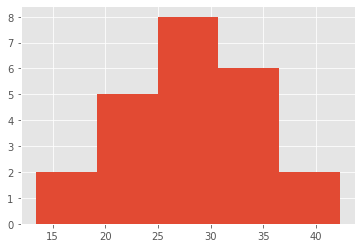

In [6]:
plt.hist(x, bins=5);

Распределение для x похоже на нормальное. Проверим гипотезу о нормальности распределения критерием Шапиро-Уилка.

In [7]:
stats.shapiro(x)[1]

0.943257212638855

p-value оказался больше уровня значимости $\alpha = 0.05$, поэтому не отвергаем гипотезу о нормальности распределения x.

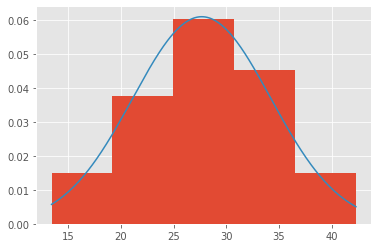

In [10]:
x_1 = np.linspace(np.min(x), np.max(x), 300)
pd.Series(x).hist(bins=5, density=1)
plt.plot(x_1, stats.norm.pdf(x_1, np.mean(x), np.std(x)));

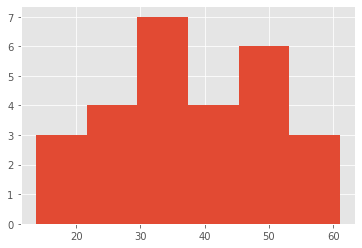

In [11]:
plt.hist(y, bins=6);

Для y, аналогично, распределение похоже на нормальное. Проверим гипотезу о нормальности критерием Шапиро-Уилка.

In [12]:
stats.shapiro(y)[1]

0.7401027679443359

p-value оказался больше уровня значимости  $𝛼=0.05$ , поэтому не отвергаем гипотезу о нормальности распределения y.

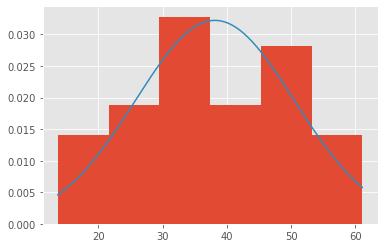

In [14]:
y_1 = np.linspace(np.min(y), np.max(y), 300)
pd.Series(y).hist(bins=6, density=1)
plt.plot(y_1, stats.norm.pdf(y_1, np.mean(y), np.std(y)))

По смыслу задачи, так как распределения x и y нормальные, мы имеем право выдвенуть следующую нулевую гипотезу: средний процент служащих в штатах с принятым законом State bargaining law равен среднему процентe служащих в штатах, где данный закон не принят.
Другими словами, проверим гипотезу о равенстве средних значений x и y. Также, дополнительно проверим гипотезу о равенстве дисперсий значений x и y критерием Флингера-Килина.

In [15]:
print(stats.ttest_ind(x,y)[1])
print(stats.fligner(x,y)[1])
print(np.mean(x))
print(np.mean(y))

0.0008111406933692372
0.0022863939638667475
27.660869565217393
38.14074074074074


Таким образом, в обоих критериях p-value оказался значительно меньше уровня значимости $\alpha = 0.05$, поэтому отвергаем гипотезу о равенстве средних x и y и отвергаем гипотезу о равенстве дисперсий x и y.
Другими словами, в штатах, где принят закон State bargaining law, средниц процент государственных служащих больше, чем средний процент государственных служащих в штатах, где этого закона нет - проиллюстрировано ящиковой диагремме снизу.

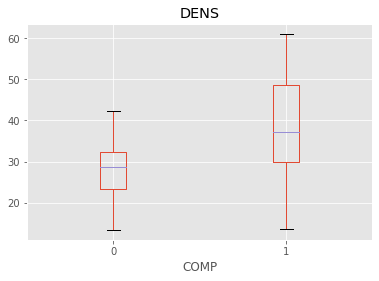

In [16]:
bp = data.boxplot(column='DENS', by='COMP')
bp.get_figure().suptitle('');

Вывод: в ходе лабораторной работы было выяснено, что в США в 1982 году на рынке труда в области государственной службы наблюдалась следующая тенденция - в штатах, где был установлен закон State bargaining law, было больше государственных служащих чем в штатах, где этого закона не было, о чем свидетельствует ящиковая диаграмма.